# **Judul**
Analisis Faktor Yang Mempengaruhi Peringkat dan Popularitas Anime Berdasarkan Dataset MyAnimeList

# Studi Kasus

Industri anime global mengalami pertumbuhan pesat dalam beberapa tahun terakhir, didukung oleh platform streaming seperti Kusonime dan komunitas daring seperti MyAnimeList. Dalam platform tersebut, peringkat anime ditentukan berdasarkan banyaknya indikator seperti score (rating pengguna), jumlah members, popularitas, tipe anime (TV/Movie), serta jumlah episode.

Namun, dalam praktiknya sering ditemukan fenomena bahwa anime dengan score yang tinggi tidak selalu memiliki jumlah popularitas tertinggi, dan sebaliknya, anime dengan jumlah members yang besar belum tentu berada pada peringkat pertama berdasarkan rating.

Fenomena ini menimbulkan beberapa pertanyaan penting:
- Apakah score tinggi selalu berbanding lurus dengan jumlah members?
- Apakah tipe anime (TV/Movie) berpengaruh pada tingkat popularitas?
- Apakah tahun rilis berpengaruh terhadap jumlah penonton dan peringkat?

Bagi platform streaming maupun industri hiburan, pemahaman terhadap faktor-faktor ini sangat penting bagi mereka untuk menentukan strategi promosi, lisensi, serta rekomendasi konten yang cocok kepada pengguna. Oleh karena itu, diperlukan adanya analisis terhadap variabel-variabel dalam dataset seperti score, rank, popularity, members, type, dan episodes untuk mengetahui faktor-faktor apa saja yang bisa mempengaruhi terhadap peringkat dan popularitas anime secara keseluruhan.

# **Import Library**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/datasetAVD/anime.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Memuat Dataset**

In [58]:
# Menampilkan 10 Data Teratas
df.head(10)

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...
5,15417,Gintama': Enchousen,9.02,12,756,352114,"While Gintoki Sakata was away, the Yorozuya fo...",2012-01-01,2013-01-01,TV,13.0,https://cdn.myanimelist.net/images/anime/1452/...
6,39486,Gintama: The Final,9.05,7,1512,177094,Two years have passed following the Tendoshuu'...,2021-01-01,2021-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1245/...
7,38524,Shingeki no Kyojin Season 3 Part 2,9.05,6,21,2520232,Seeking to restore humanity's diminishing hope...,2019-01-01,2019-01-01,TV,10.0,https://cdn.myanimelist.net/images/anime/1517/...
8,34096,Gintama.,8.98,15,786,342178,After joining the resistance against the bakuf...,2017-01-01,2017-01-01,TV,12.0,https://cdn.myanimelist.net/images/anime/3/835...
9,41467,Bleach: Sennen Kessen-hen,8.99,14,353,671091,Substitute Soul Reaper Ichigo Kurosaki spends ...,2022-01-01,2022-01-01,TV,13.0,https://cdn.myanimelist.net/images/anime/1908/...


In [59]:
# Menampilkan 10 Data Terbawah
df.tail(10)

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
9990,3080,Anime Tenchou,6.05,9995,6520,12088,This is the Animation Store Manager!! Anime Te...,2002-01-01,2002-01-01,OVA,1.0,https://cdn.myanimelist.net/images/anime/1990/...
9991,7597,"Boku, Otaryman.",6.05,9998,9527,4667,"Boku, Otary-man (otaku + salaryman) is a autob...",2010-01-01,2010-01-01,OVA,1.0,https://cdn.myanimelist.net/images/anime/13/19...
9992,9166,Attack No.1: Namida no Sekai Senshuken,6.05,9997,14357,1152,The third Attack No.1 recap film. This covers ...,1970-01-01,1970-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1003/...
9993,49215,Celia-sensei no Wakuwaku Magical Kyoushitsu,6.05,10000,8591,6140,Informational mini anime posted on the anime's...,2021-01-01,2021-01-01,ONA,18.0,https://cdn.myanimelist.net/images/anime/1928/...
9994,53626,"Bye Bye, Earth",6.05,9999,2921,69155,In a society of people with animal characteris...,2024-01-01,2024-01-01,TV,10.0,https://cdn.myanimelist.net/images/anime/1104/...
9995,1351,Angel Cop,6.05,9994,4755,26983,"Sometime in the future, terrorism in Japan has...",1989-01-01,1994-01-01,OVA,6.0,https://cdn.myanimelist.net/images/anime/1377/...
9996,33339,Zhongguo Jingqi Xiansheng,6.05,9991,10781,3192,A lost form of magic is revived from the Easte...,2014-01-01,2016-01-01,ONA,63.0,https://cdn.myanimelist.net/images/anime/1637/...
9997,2840,Youkoso Lodoss-tou e!,6.05,9988,11348,2710,This movie is the compilation of the 27 mini-p...,1998-01-01,1998-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/7/613...
9998,33764,Ying Xiong Bie Nao,6.05,9987,17963,502,The series takes place on a parallel world fil...,2015-01-01,2015-01-01,ONA,13.0,https://cdn.myanimelist.net/images/anime/1013/...
9999,49700,Arifureta Shokugyou de Sekai Saikyou Picture D...,6.05,9996,10448,3510,An online motion graphic spin-off series that ...,2019-01-01,2019-01-01,ONA,13.0,https://cdn.myanimelist.net/images/anime/1169/...


# **Bussiness Understanding**

**Bussiness Objective**

Tujuan dari analisis ini adalah untuk memahami faktor-faktor apa saja yang dapat mempengaruhi peringkat dan tingkat popularitas anime berdasarkan dataset MyAnimeList.

Analisis difokuskan pada indikator seperti score (rating pengguna), jumlah members, popularitas, tipe anime (TV/Movie), jumlah episode, serta tahun rilis untuk melihat bagaimana variabel-variabel tersebut memengaruhi posisi peringkat pada suatu anime.

Analisis ini diharapkan dapat memberikan wawasan mengenai hubungan antara kualitas, popularitas, dan karakteristik pada produksi anime, sehingga dapat digunakan sebagai dasar dalam pengambilan keputusan strategis oleh platform streaming, distributor, maupun rumah produksi hiburan dalam menentukan strategi promosi dan lisensi konten.

---

**Assess Situation**

Dataset yang digunakan merupakan dataset ranking anime (bersumber dari MyAnimeList/Kaggle) yang terdiri dari beberapa variabel numerik dan kategorikal, seperti:
- anime_id
- title
- score
- rank
- popularity
- members
- start_date
- end_date
- type
- episodes

Beberapa potensi kendala dalam dataset yang mungkin mempengaruhi hasil analisis antara lain:
- Adanya missing value pada kolom seperti episodes atau end_date
- Perbedaan skala antara variabel (sebagai contoh score dalam rentang 1–10, sedangkan members dalam mencapai jutaan)
- Potensi outlier pada variabel members (sebagai contoh anime dengan fanbase yang besar seperti Shingeki no Kyojin)
- Perbedaan tahun rilis yang dapat mempengaruhi jumlah members dan popularity ranking
- Perbedaan karakteristik antara anime tipe TV dan Movie

Sehingga diperlukan proses persiapan data sebelum dilakukan analisis lebih lanjut.

---

**Analytic Goals**

Untuk mengatasi permasalahan tersebut, analisis akan dilakukan dengan tujuan untuk:

- Mengidentifikasi pola distribusi skor anime
- Menganalisis hubungan antara score dan jumlah members
- Membandingkan popularitas berdasarkan tipe anime (TV/Movie)
- Menganalisis pengaruh jumlah episode terhadap jumlah members
- Mengidentifikasi pengaruh tahun rilis terhadap popularity ranking
- Mengetahui apakah anime dengan score yang tinggi selalu memiliki popularitas yang sama tinggi

---

**Project Plan**

Tahapan analisis data yang akan dilakukan dalam penelitian ini meliputi:
1. Import dataset ranking anime dari MyAnimeList/Kaggle
2. Memahami struktur dan tipe data pada dataset
3. Melakukan pembersihan data seperti:
- Penanganan pada missing value
- Penghapusan data duplikat
- Deteksi dan penanganan data outlier
4. Melakukan eksplorasi data menggunakan statistik deskriptif
5. Melakukan visualisasi data untuk melihat:
- Distribusi score anime
- Distribusi jumlah members
- Perbandingan pada tipe anime
- Hubungan antara score dan jumlah members
- Pengaruh jumlah episode terhadap popularitas
- Tren berdasarkan tahun rilis
6. Menarik insight dari hasil visualisasi
7. Menyusun rekomendasi strategis berdasarkan insight yang diperoleh

# **Data Understanding**

## **Informasi Dasar**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 10000 Baris dan 12 Kolom

## **Informasi Lanjutan**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


Informasi lanjutan dalam kolom:

1. **anime_id**: Jumlah baris: 10000 | Tipe data: int64 | Deskripsi: ID unik untuk setiap anime.

2. **title**: Jumlah baris: 10000 | Tipe data: object | Deskripsi: Judul anime.

3. **score**: Jumlah baris: 10000 | Tipe data: float64 | Deskripsi: Skor atau rating rata-rata anime dari pengguna.

4. **rank**: Jumlah baris: 10000 | Tipe data: int64 | Deskripsi: Peringkat anime berdasarkan skornya.

5. **popularity**: Jumlah baris: 10000 | Tipe data: int64 | Deskripsi: Peringkat popularitas anime.

6. **members**: Jumlah baris: 10000 | Tipe data: int64 | Deskripsi: Jumlah anggota MyAnimeList yang telah menambahkan anime ini ke daftar mereka.

7. **synopsis**: Jumlah baris: 9998 | Tipe data: object | Deskripsi: Ringkasan atau sinopsis cerita anime.

8. **start_date**: Jumlah baris: 9998 | Tipe data: object | Deskripsi: Tanggal mulai tayang atau rilis anime.

9. **end_date**: Jumlah baris: 9916 | Tipe data: object | Deskripsi: Tanggal selesai tayang atau rilis anime.

10. **type**: Jumlah baris: 10000 | Tipe data: object | Deskripsi: Tipe anime (misalnya: TV, Movie, OVA, ONA, dll).

11. **episodes**: Jumlah baris: 9952 | Tipe data: float64 | Deskripsi: Jumlah episode dari anime.

12. **image_url**: Jumlah baris: 10000 | Tipe data: object | Deskripsi: URL gambar sampul atau poster anime.

## **Informasi Statistik Deskriptif**

In [62]:
df.describe(include='all')

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
count,10000.000000,10000,10000.000000,10000.000000,10000.000000,1.000000e+04,9998,9998,9916,10000,9952.000000,10000
unique,NaN,9999,NaN,NaN,NaN,NaN,9762,68,69,6,NaN,9999
top,NaN,Ling Jian Zun 4th Season,NaN,NaN,NaN,NaN,No synopsis information has been added to this...,2023-01-01,2023-01-01,TV,NaN,https://cdn.myanimelist.net/images/anime/1972/...
freq,NaN,2,NaN,NaN,NaN,NaN,167,474,482,4330,NaN,2
mean,24129.128000,NaN,6.980589,5000.494000,6490.903700,1.075309e+05,NaN,NaN,NaN,NaN,15.702271,NaN
std,19948.188153,NaN,0.619406,2886.898727,4646.309341,2.733514e+05,NaN,NaN,NaN,NaN,41.865696,NaN
min,1.000000,NaN,6.050000,1.000000,1.000000,2.260000e+02,NaN,NaN,NaN,NaN,1.000000,NaN
25%,4055.500000,NaN,6.470000,2500.750000,2591.750000,4.270250e+03,NaN,NaN,NaN,NaN,1.000000,NaN
50%,21406.000000,NaN,6.900000,5000.500000,5564.500000,1.817900e+04,NaN,NaN,NaN,NaN,11.000000,NaN
75%,40028.750000,NaN,7.390000,7500.250000,9824.250000,8.469275e+04,NaN,NaN,NaN,NaN,13.000000,NaN


### **1. Count (Kelengkapan Data)**

Total data anime adalah **10.000 baris**. Namun terdapat beberapa kolom yang tidak lengkap:

* **synopsis** → 9.998 data (hilang 2 data)
* **start_date** → 9.998 data (hilang 2 data)
* **end_date** → 9.916 data (hilang 84 data)
* **episodes** → 9.952 data (hilang 48 data)

Kolom lainnya seperti **anime_id, title, score, rank, popularity, members, type, image_url** lengkap dengan 10.000 data.

**Kesimpulan:**
Kolom yang memiliki missing values adalah **synopsis, start_date, end_date, dan episodes**. Secara umum dataset sudah sangat lengkap (>99%).

---

### **2. Mean vs Median (Distribusi Data)**

### Score

* Mean = **6.98**
* Median = **6.90**

Nilai rata-rata sedikit lebih tinggi dari median, menunjukkan distribusi relatif simetris dengan sedikit kecenderungan ke kanan (ada anime dengan skor tinggi yang menarik rata-rata naik).

---

### Rank

* Mean = **5000.49**
* Median = **5000.50**

Mean dan median hampir identik, menunjukkan distribusi rank sangat simetris dan merata dari peringkat 1 sampai 10.000.

---

### Popularity

* Mean = **6490.90**
* Median = **5564.50**

Mean lebih besar dari median → distribusi **right-skewed**.
Artinya ada sejumlah anime dengan tingkat popularitas sangat rendah (angka popularity besar) yang menarik rata-rata ke atas.

---

### Members

* Mean = **107.530**
* Median = **18.179**

Perbedaannya sangat besar. Ini menunjukkan distribusi sangat **right-skewed**.
Hanya sebagian kecil anime yang memiliki jutaan member, sementara mayoritas memiliki jumlah member relatif kecil.

---

### Episodes

* Mean = **15.70**
* Median = **11**

Mean lebih tinggi dari median → terdapat beberapa anime dengan jumlah episode sangat banyak yang menarik rata-rata ke atas.

**Kesimpulan umum distribusi:**
Variabel **members, popularity, dan episodes** cenderung right-skewed (condong ke kanan), sedangkan **rank** relatif simetris.

---

### **3. Min dan Max (Validasi Logika)**

### Score

* Min = **6.05**
* Max = **9.29**

Rentang skor cukup sempit → dataset tampaknya hanya berisi anime dengan rating cukup tinggi (tidak ada skor di bawah 6).

---

### Rank

* Min = **1**
* Max = **10.000**

Logis dan sesuai dengan jumlah data.

---

### Popularity

* Min = **1**
* Max = **22.184**

Rentang cukup lebar, menunjukkan perbedaan besar antara anime paling populer dan yang kurang populer.

---

### Members

* Min = **226**
* Max = **4.262.220**

Perbedaan sangat ekstrem. Anime terpopuler memiliki lebih dari 4 juta member, sedangkan yang paling rendah hanya 226.

---

### Episodes

* Min = **1**
* Max = **1.787**

Nilai maksimum 1.787 episode sangat tinggi dan perlu divalidasi — kemungkinan merupakan anime panjang seperti **One Piece** atau seri dengan banyak season yang digabung.

**Kesimpulan:**
Rentang nilai terutama pada **members** dan **episodes** sangat lebar dan berpotensi mengandung outlier.

---

### **4. Standar Deviasi (Std) – Variabilitas Data**

### Score

* Mean = 6.98
* Std = 0.62

Variasi skor relatif kecil → mayoritas anime memiliki skor yang tidak terlalu jauh dari rata-rata.

---

### Rank

* Mean = 5000
* Std = 2886

Standar deviasi besar namun wajar karena rank tersebar merata dari 1–10.000.

---

### Popularity

* Mean = 6490
* Std = 4646

Variasi tinggi, menunjukkan perbedaan signifikan antara anime populer dan kurang populer.

---

### Members

* Mean = 107.530
* Std = 273.351

Standar deviasi jauh lebih besar dari mean → distribusi sangat tidak merata dan dipengaruhi anime dengan jutaan member.

---

### Episodes

* Mean = 15.70
* Std = 41.86

Standar deviasi hampir 3x dari mean → jumlah episode sangat bervariasi.

---

### **5. Analisis Kolom Kategorikal**

### Title

* 9.999 judul unik dari 10.000 data
* Ada 1 judul yang muncul 2 kali → kemungkinan season berbeda atau duplikasi data.

---

### 📌 Type

Terdapat 6 tipe anime, dengan tipe paling dominan adalah:

* **TV** → muncul 4.330 kali

Artinya mayoritas anime dalam dataset adalah serial TV.

---

### Start Date & End Date

* Terdapat 68 tanggal mulai unik
* Tanggal paling sering muncul: **2023-01-01**

Kemungkinan banyak anime yang belum memiliki tanggal pasti sehingga menggunakan default date.

---

## Kesimpulan Akhir

1. Dataset sangat lengkap dengan sedikit missing values.
2. Distribusi **members dan episodes sangat tidak merata (right-skewed)**.
3. Terdapat kemungkinan outlier pada jumlah episode dan member.
4. Mayoritas anime bertipe TV.
5. Skor anime relatif stabil di kisaran 6–9.

# **Verifikasi Kualitas Data**

## **Data Type Check**
Kita perlu mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Hal ini penting agar insight serta visualisasi yang akan kita buat menjadi akurat dan representatif terhadap kondisi sebenarnya.

Dan dapat dilihat dibawah ini, Semua kolom telah memiliki tipe data yang tepat.

In [63]:
df.dtypes

,0
anime_id,int64
title,object
score,float64
rank,int64
popularity,int64
members,int64
synopsis,object
start_date,object
end_date,object
type,object


## **Incosistent Values**

Pada tahap ini, kita perlu mengecek kekonsistenan data, contoh nya dalam penulisan. Hal ini dilakukan agar data tidak terduplikat dengan baris yang sebenarnya sama akan tetapi bisa terduplikat karena tidak konsisten.

In [64]:
for column in df.columns:
    print(f"Unique values for column '{column}':\n{df[column].unique()}\n")

Unique values for column 'anime_id':
[28977 57555 11061 ...  2840 33764 49700]

Unique values for column 'title':
['Gintama°' 'Chainsaw Man Movie: Reze-hen' 'Hunter x Hunter (2011)' ...
 'Youkoso Lodoss-tou e!' 'Ying Xiong Bie Nao'
 'Arifureta Shokugyou de Sekai Saikyou Picture Drama']

Unique values for column 'score':
[9.05 9.18 9.03 9.29 9.02 8.98 8.99 9.1  8.96 8.93 8.91 8.89 9.06 8.88
 8.86 8.9  8.84 9.07 8.94 8.78 8.83 8.79 8.77 8.76 8.75 8.73 8.74 8.81
 8.82 8.72 8.71 8.68 8.7  8.67 8.69 8.65 8.64 8.63 8.62 8.61 8.59 8.58
 8.57 8.6  8.56 8.55 8.54 8.53 8.52 8.51 8.5  8.49 8.48 8.47 8.46 8.45
 8.44 8.43 8.42 8.41 8.4  8.39 8.38 8.37 8.36 8.35 8.34 8.33 8.32 8.31
 8.3  8.29 8.28 8.27 8.26 8.25 8.24 8.23 8.22 8.21 8.2  8.19 8.18 8.17
 8.16 8.15 8.14 8.13 8.12 8.11 8.1  8.09 8.08 8.07 8.06 8.05 8.04 8.03
 8.02 8.01 8.   7.99 7.98 7.97 7.96 7.95 7.94 7.93 7.92 7.91 7.9  7.89
 7.88 7.87 7.86 7.85 7.84 7.83 7.82 7.81 7.8  7.79 7.78 7.77 7.76 7.75
 7.74 7.73 7.72 7.71 7.7  7.69 7.68 7.6

Setelah melakukan iterasi dan menampilkan nilai unik untuk setiap kolom pada DataFrame `df`, berikut adalah beberapa observasi penting:

*   **anime_id**: Berisi nilai integer unik untuk setiap anime, mengkonfirmasi bahwa kolom ini dapat berfungsi sebagai identifikasi unik.

*   **title**: Sebagian besar judul unik, namun seperti yang tertera pada `df.describe(include='all')`, terdapat satu judul (`Ling Jian Zun 4th Season`) yang muncul dua kali. Ini mungkin menunjukkan entri duplikat atau variasi, tetapi secara umum, judul terlihat konsisten.

*   **score, rank, popularity, members, episodes**: Semua kolom ini berisi nilai numerik yang bervariasi sesuai dengan rentang yang diharapkan (misalnya, `score` dari 6.05 hingga 9.29). Tidak ada nilai non-numerik yang terlihat, yang menunjukkan konsistensi tipe data.

*   **synopsis**: Menampilkan teks sinopsis yang panjang dan bervariasi. Adanya `nan` menunjukkan adanya missing values, yang sudah teridentifikasi sebelumnya.

*   **start_date & end_date**: Kolom tanggal ini memiliki berbagai nilai tanggal, namun juga terdapat `nan` yang mengindikasikan missing values. Format tanggal terlihat konsisten (`YYYY-MM-DD`). Kolom `start_date` juga menunjukkan beberapa tanggal yang mungkin merupakan *placeholder* atau *default date* (misalnya, '2023-01-01' sebagai *top*).

*   **type**: Menampilkan kategori yang terbatas dan konsisten seperti 'TV', 'Movie', 'OVA', 'TV Special', 'ONA', dan 'Special'. Ini adalah kolom kategorikal yang bersih.

*   **image_url**: Berisi URL yang unik untuk sebagian besar anime, tidak ada inkonsistensi yang terlihat.

Secara keseluruhan, sebagian besar kolom memiliki nilai yang konsisten dan sesuai dengan tipe datanya. Potensi masalah utama tetap pada *missing values* di kolom `synopsis`, `start_date`, `end_date`, dan `episodes`, serta duplikasi pada kolom `title` yang perlu diperiksa lebih lanjut jika relevan dengan tujuan analisis.

## **Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang (missing values) pada setiap kolom. Hal ini penting dilakukan agar kita mengetahui kolom mana yang perlu ditangani sebelum proses analisis lebih lanjut.

In [65]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
anime_id,0.00
title,0.00
score,0.00
rank,0.00
popularity,0.00
members,0.00
synopsis,0.02
start_date,0.02
end_date,0.84
type,0.00


Berdasarkan hasil pengecekan missing values di atas, hampir seluruh kolom memiliki data yang lengkap dengan rasio missing 0%. Ini menunjukkan bahwa kualitas dataset secara umum sangat baik dan siap digunakan untuk analisis tanpa pembersihan besar.

Namun, terdapat beberapa kolom yang memiliki missing values dalam jumlah kecil, yaitu:

- `synopsis` sebesar 0,02% (±2 baris dari 10.000 data)

- `start_date` sebesar 0,02% (±2 baris)

- `end_date` sebesar 0,84% (±84 baris)

- `episodes` sebesar 0,48% (±48 baris)

Missing values pada kolom `synopsis` kemungkinan terjadi karena belum adanya deskripsi yang ditambahkan untuk beberapa anime. Jumlahnya sangat kecil sehingga tidak berdampak signifikan terhadap analisis.

Pada kolom `start_date`, jumlah missing yang sangat kecil kemungkinan disebabkan oleh penggunaan tanggal default atau placeholder (misalnya seperti '2023-01-01' yang muncul sebagai nilai paling sering), sehingga beberapa data tidak memiliki tanggal rilis yang sebenarnya.

Kolom `end_date` memiliki missing terbesar (0,84%). Hal ini sangat mungkin terjadi karena beberapa anime masih berstatus ongoing (masih tayang), sehingga tanggal tamat belum tersedia. Dengan demikian, missing values ini bukan karena kesalahan input, melainkan karena kondisi alami dari data (anime yang belum selesai).

Sementara itu, missing pada kolom `episodes` (0,48%) kemungkinan terjadi karena jumlah episode belum dikonfirmasi atau anime belum selesai ditayangkan.

## **Duplicated Values**
Pada tahap ini, kita akan mengecek apakah terdapat data duplikasi dalam dataset. Duplikasi data dapat menyebabkan bias pada analisis karena satu entri dihitung lebih dari satu kali.

In [66]:
df[df.duplicated()]

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
3216,41884,Ling Jian Zun 4th Season,7.26,3148,10481,3467,Fourth season of Ling Jian Zun .,2020-01-01,2025-01-01,ONA,560.0,https://cdn.myanimelist.net/images/anime/1972/...


Terlihat pada dataset ini ada duplikasi. Maka hal ini perlu ditangani

## **Outliers Values**

Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset.

In [67]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Outliers in %': percent_outliers})

# Dataframe dari list hasil
results_ = pd.DataFrame(results)
results_.set_index('Kolom', inplace=True)
results_ = results_.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_)

Kolom,Outliers in %
anime_id,0.00
score,0.41
rank,0.00
popularity,0.14
members,12.96
episodes,10.95


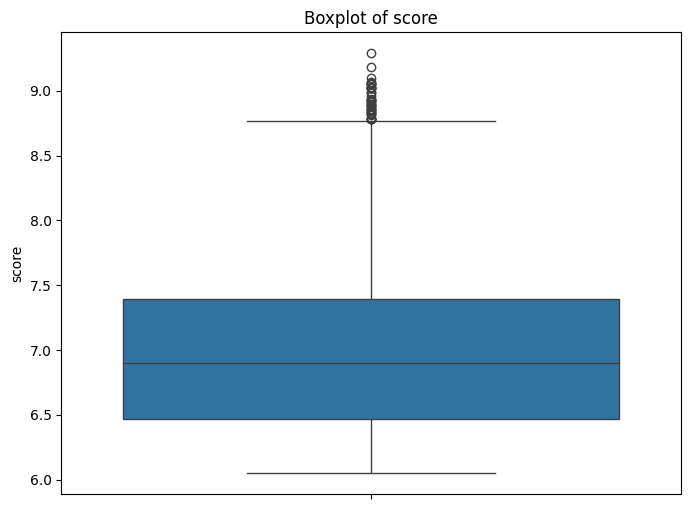

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['score'])
plt.title('Boxplot of score')
plt.ylabel('score')
plt.show()

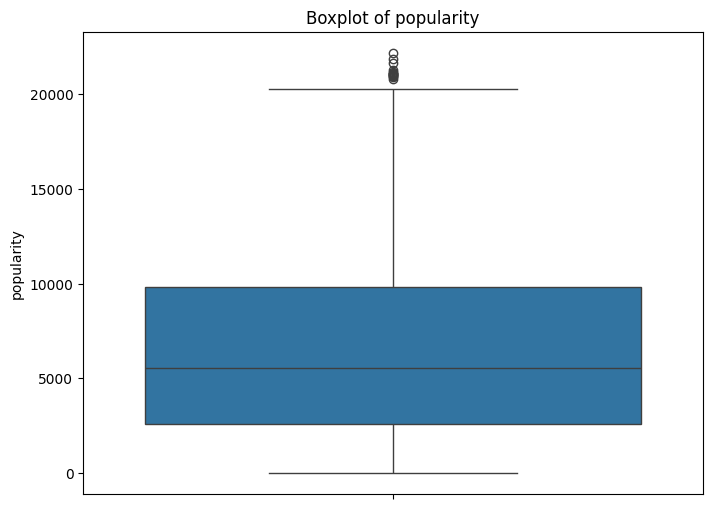

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['popularity'])
plt.title('Boxplot of popularity')
plt.ylabel('popularity')
plt.show()

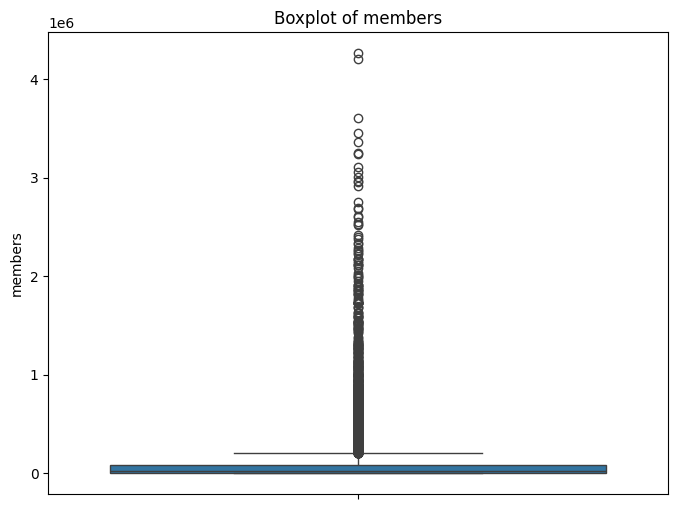

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['members'])
plt.title('Boxplot of members')
plt.ylabel('members')
plt.show()

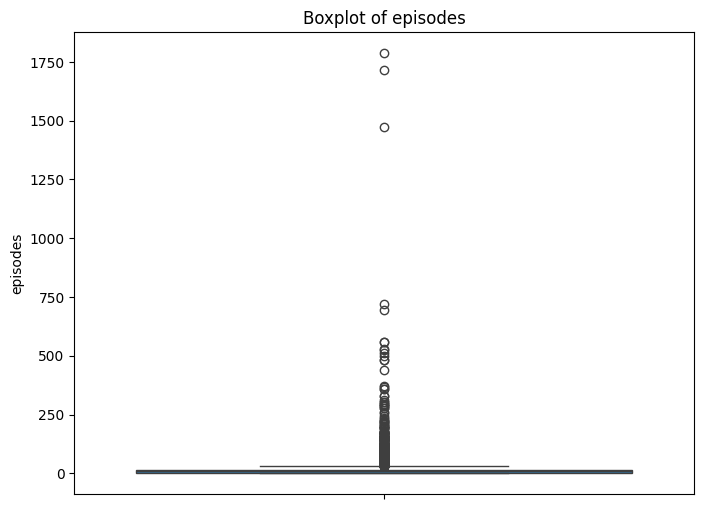

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['episodes'])
plt.title('Boxplot of episodes')
plt.ylabel('episodes')
plt.show()

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

Aktivitas: Membandingkan total anggota `members` pada setiap judul anime `title`.

Tujuan: Mengidentifikasi anime mana yang memiliki jumlah anggota terbanyak.

Visualisasi: Bar Chart (Grafik Batang).

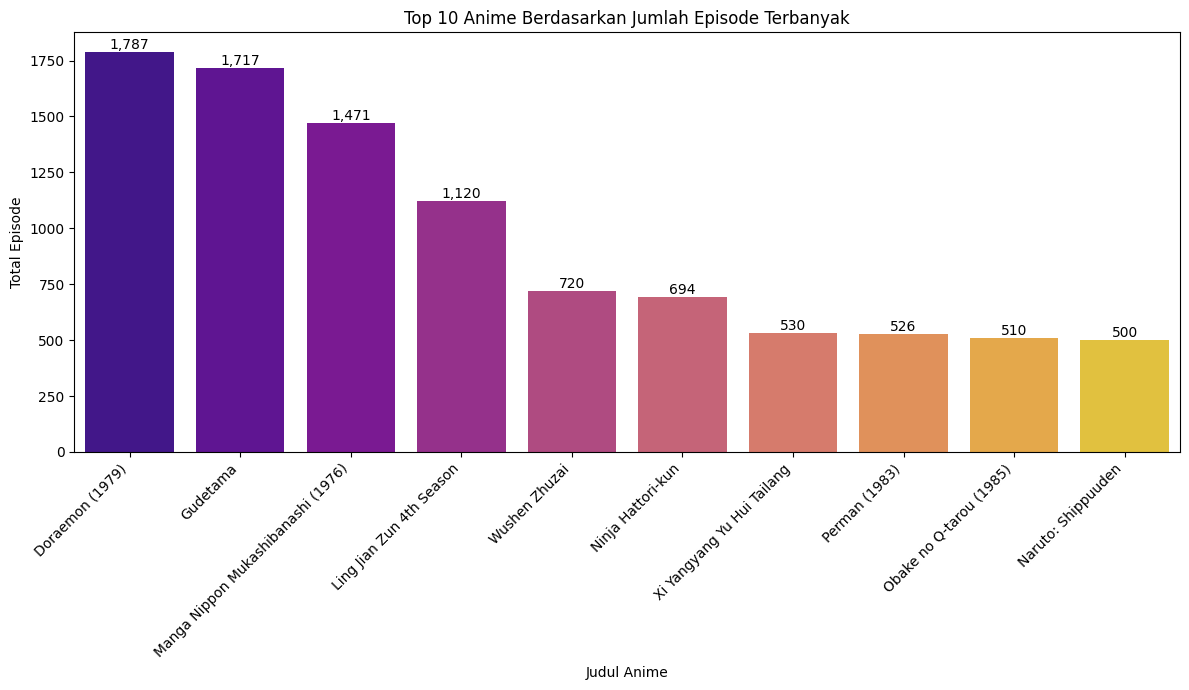

In [72]:
compmem = df.groupby('title')['episodes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=compmem.index, y=compmem.values, palette='plasma', hue=compmem.index, legend=False)
plt.title('Top 10 Anime Berdasarkan Jumlah Episode Terbanyak')
plt.xlabel('Judul Anime')
plt.ylabel('Total Episode')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tambahkan total episode pada setiap anime
for index, value in enumerate(compmem.values):
    ax.text(index, value, f'{int(value):,}', color='black', ha="center", va='bottom')

plt.show()

## **Composition/Komposisi**

Aktivitas: Melihat proporsi atau persentase total popularitas `popularity` berdasarkan kategori tipe anime `type`.

Tujuan: Mengetahui kategori tipe anime mana yang paling mendominasi popularitas secara keseluruhan.

Visualisasi: Pie Chart (Grafik Pastai).

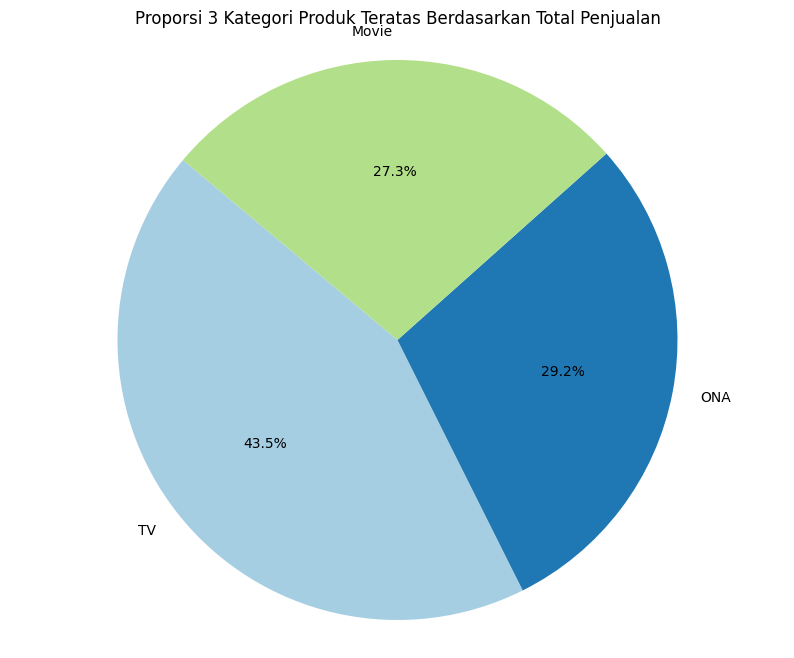

In [73]:
comptype = df.groupby('type')['popularity'].sum().sort_values(ascending=False)
comptype_top3 = comptype.head(3)

plt.figure(figsize=(10, 8))
comptype_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi 3 Kategori Produk Teratas Berdasarkan Total Penjualan')
plt.ylabel('')
plt.axis('equal')
plt.show()

## **Distribution/Distribusi**

Aktivitas: Menganalisis penyebaran nilai skor pada kolom skor `score`.

Tujuan: Melihat apakah mayoritas transaksi bernilai kecil atau besar, serta mendeteksi adanya kecondongan (skewness) dalam data penjualan.

Visualisasi: Histogram.

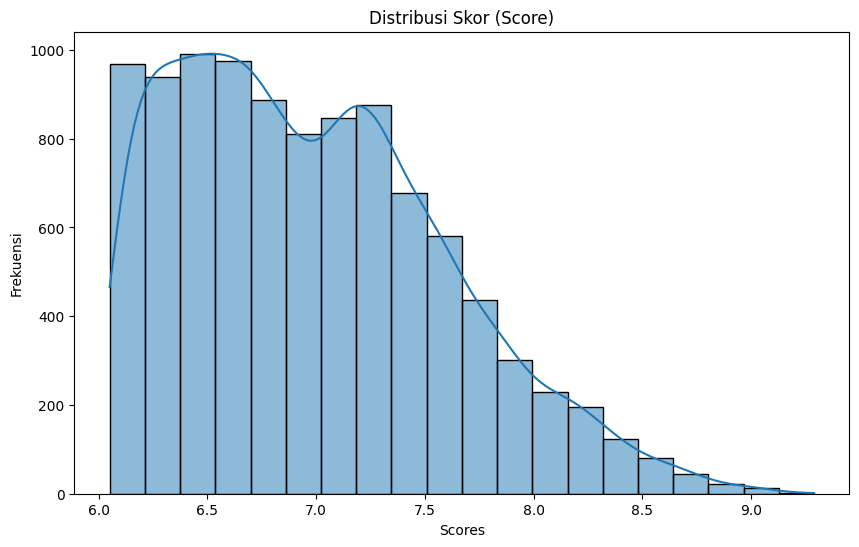

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribusi Skor (Score)')
plt.xlabel('Scores')
plt.ylabel('Frekuensi')
plt.show()

## **Relationship/Hubungan**

Aktivitas: Menganalisis korelasi antara nilai popularitas `popularity` dengan skor `score`.

Tujuan: Mengetahui apakah peningkatan popularitas selalu berbanding lurus dengan peningkatan skor pada anime.

Visualisasi: Heatmap

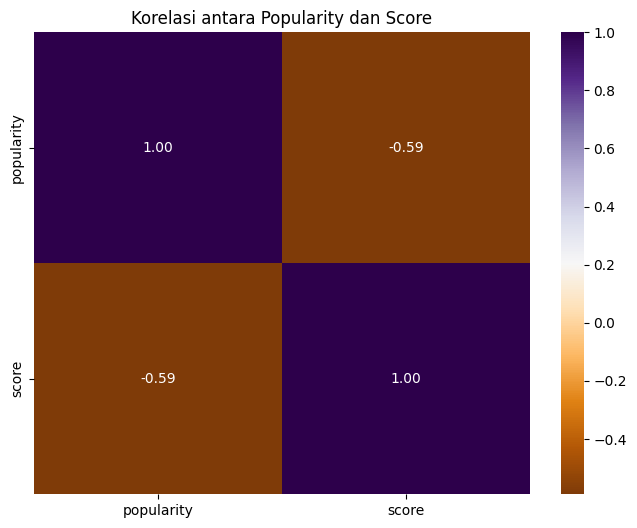

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['popularity', 'score']].corr(),
            annot=True,
            cmap='PuOr',
            fmt='.2f')
plt.title('Korelasi antara Popularity dan Score')
plt.show()

# **Data Preparation**

## Tipe Data

Berdasarkan hasil pemeriksaan sebelumnya, tipe data pada dataset anime ini telah sesuai dengan karakteristik masing-masing kolom. Kolom `anime_id`, `rank`, `popularity`, dan `members` sudah bertipe numerik (int64) karena berisi nilai bilangan bulat. Kolom `score` dan `episodes` bertipe float64, yang sudah tepat karena memungkinkan adanya nilai desimal.

Sementara itu, kolom `title`, `synopsis`, `type`, dan `image_url` bertipe object (string) karena memuat data berbentuk teks. Kolom `start_date` dan `end_date` juga tersimpan dalam format yang sesuai untuk merepresentasikan data waktu (datetime), sehingga dapat digunakan untuk analisis berbasis periode rilis. Secara keseluruhan, struktur tipe data pada dataset ini sudah konsisten dan siap untuk digunakan dalam proses analisis lebih lanjut

## Inconsistent Values

Berdasarkan hasil pemeriksaan yang telah dilakukan sebelumnya, tidak terdapat ketidaksesuaian maupun inkonsistensi pada dataset ini, sehingga data dinilai telah tersusun dengan baik dan konsisten untuk digunakan dalam proses analisis selanjutnya.

## Missing Values

In [76]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
anime_id,0.00
title,0.00
score,0.00
rank,0.00
popularity,0.00
members,0.00
synopsis,0.02
start_date,0.02
end_date,0.84
type,0.00


Missing value pada dataset ini tidak dapat ditangani dengan metode imputasi karena memiliki karakteristik yang berbeda-beda.

Missing pada kolom `synopsis` dan `start_date` jumlahnya sangat kecil dan tidak berpengaruh signifikan terhadap analisis, kemungkinan karena deskripsi belum tersedia atau penggunaan tanggal placeholder.

Kolom `end_date` memiliki missing terbesar (0,84%) yang wajar terjadi karena beberapa anime masih berstatus *ongoing* sehingga belum memiliki tanggal selesai.

Sementara itu, missing pada `episodes` (0,48%) kemungkinan disebabkan oleh jumlah episode yang belum diumumkan atau anime yang belum tamat tayang.

## Duplicated Values

Telah ditemukan data duplikat (duplicated values) melalui pemeriksaan sebelumnya, maka hal ini perlu ditangani

In [77]:
df[df.duplicated()]

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
3216,41884,Ling Jian Zun 4th Season,7.26,3148,10481,3467,Fourth season of Ling Jian Zun .,2020-01-01,2025-01-01,ONA,560.0,https://cdn.myanimelist.net/images/anime/1972/...


In [78]:
df = df.drop_duplicates()

In [79]:
df[df.duplicated()]

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url


## Outliers Values

In [80]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
anime_id,0.000000
score,0.410041
rank,0.000000
popularity,0.140014
members,12.961296
episodes,10.941094


Outlier pada dataset ini tidak perlu dilakukan penanganan khusus karena sebagian besar mencerminkan variasi alami dalam data, bukan akibat kesalahan input atau pencatatan. Nilai-nilai ekstrem tersebut merepresentasikan kondisi nyata di dalam dataset, sehingga jika dihapus atau dimodifikasi justru berpotensi menghilangkan informasi penting dan menimbulkan bias pada hasil analisis.

# **Data Construction**

In [81]:
def rating_category(score):
    if score == 10:
        return "Masterpiece"
    elif score >= 9:
        return "Great"
    elif score >= 8:
        return "Very Good"
    elif score >= 7:
        return "Good"
    elif score >= 6:
        return "Fine"
    elif score >= 5:
        return "Average"
    elif score >= 4:
        return "Bad"
    elif score >= 3:
        return "Very Bad"
    elif score >= 2:
        return "Horrible"
    elif score >= 1:
        return "Appalling"
    elif score >= 0:
        return "Trash"
    else:
        return "Unknown"

# Tambahkan kolom baru ke dataframe
df["rating_category"] = df["score"].apply(rating_category)

# Contoh output
df[["title", "score", "rating_category"]].sample(10)

,title,score,rating_category
7817,Kämpfer für die Liebe,6.42,Fine
39,Vinland Saga,8.77,Very Good
1752,Sword Art Online: Alicization,7.57,Good
2191,Sayonara Zetsubou Sensei Special,7.46,Good
142,JoJo no Kimyou na Bouken Part 6: Stone Ocean P...,8.51,Very Good
545,Buddy Daddies,8.10,Very Good
7961,Cutie Honey,6.40,Fine
4606,Rekka no Honoo: Final Burning,6.98,Fine
4382,Koutetsu Jeeg,7.04,Good
4251,Seihou Bukyou Outlaw Star Specials,7.06,Good


Data construction `rating_category` dilakukan untuk mengubah skor numerik menjadi kategori kualitas yang lebih mudah dipahami, mempermudah segmentasi dan visualisasi data, serta mendukung analisis atau pemodelan lebih lanjut.

# **Data Reduction**

In [82]:
df = df.drop('synopsis', axis=1)
df = df.drop('image_url', axis=1)

Kolom **`synopsis`** dan **`image_url`** dapat dihapus karena tidak relevan untuk analisis kuantitatif atau pemodelan berbasis numerik; `synopsis` hanya merupakan data teks panjang tentang anime tersebut, sedangkan `image_url` hanya berupa tautan gambar yang tidak memberikan kontribusi langsung terhadap analisis statistik atau perhitungan variabel.


# **Memuat Dataset Setelah Perbaikan**

In [84]:
df

,anime_id,title,score,rank,popularity,members,start_date,end_date,type,episodes,rating_category
0,28977,Gintama°,9.05,8,347,680037,2015-01-01,2016-01-01,TV,51.0,Great
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,2025-01-01,2025-01-01,Movie,1.0,Great
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,2011-01-01,2014-01-01,TV,148.0,Great
3,52991,Sousou no Frieren,9.29,1,121,1269074,2023-01-01,2024-01-01,TV,28.0,Great
4,9969,Gintama',9.02,11,406,601940,2011-01-01,2012-01-01,TV,51.0,Great
...,...,...,...,...,...,...,...,...,...,...,...
9995,1351,Angel Cop,6.05,9994,4755,26983,1989-01-01,1994-01-01,OVA,6.0,Fine
9996,33339,Zhongguo Jingqi Xiansheng,6.05,9991,10781,3192,2014-01-01,2016-01-01,ONA,63.0,Fine
9997,2840,Youkoso Lodoss-tou e!,6.05,9988,11348,2710,1998-01-01,1998-01-01,Movie,1.0,Fine
9998,33764,Ying Xiong Bie Nao,6.05,9987,17963,502,2015-01-01,2015-01-01,ONA,13.0,Fine


# **Menyimpan Dataset**

In [83]:
df.to_csv('[Bersih]TopAnime.csv', index=False)